# Loan Application Risk

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"]=(20,10)

## Reading Dataset

In [2]:
df=pd.read_excel('ML7 KNN Loan Appplicant Risk.xlsx')

In [3]:
df.head()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
0,40.50,2,6,0.842666,594,0,0
1,41.25,5,2,0.791667,754,0,0
2,39.50,5,2,0.727273,779,0,0
3,35.00,1,4,0.820232,818,0,0
4,34.00,3,3,0.455581,853,0,1


### Getting Basic Statistics

In [4]:
df.describe()

,Age,Total Work Experience,Number of years in city,Cost to Request Ratio,Cibil score,Overdrafts past12months,Total bounces past12months
count,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000,8995.000000
mean,38.808202,2.131073,4.288160,0.831183,752.626570,0.322068,1.162757
std,10.203371,0.892141,1.269416,0.490216,67.645792,0.914998,2.352798
min,18.100000,1.000000,1.000000,0.008466,351.000000,0.000000,0.000000
25%,30.830000,1.000000,3.000000,0.662147,730.000000,0.000000,0.000000
50%,37.200000,2.000000,4.000000,0.800000,768.000000,0.000000,0.000000
75%,45.400000,3.000000,5.000000,0.930908,797.000000,0.000000,1.000000
max,83.800000,5.000000,6.000000,12.006623,882.000000,12.000000,12.000000


### Getting Informaion of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         8995 non-null   float64
 1   Total Work Experience       8995 non-null   int64  
 2   Number of years in city     8995 non-null   int64  
 3   Cost to Request Ratio       8995 non-null   float64
 4   Cibil score                 8995 non-null   int64  
 5   Overdrafts past12months     8995 non-null   int64  
 6   Total bounces past12months  8995 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 492.0 KB


In [6]:
df.shape

(8995, 7)

### EDA

In [7]:
df.isna().sum()

Age                           0
Total Work Experience         0
Number of years in city       0
Cost to Request Ratio         0
Cibil score                   0
Overdrafts past12months       0
Total bounces past12months    0
dtype: int64

#### There is No null Values

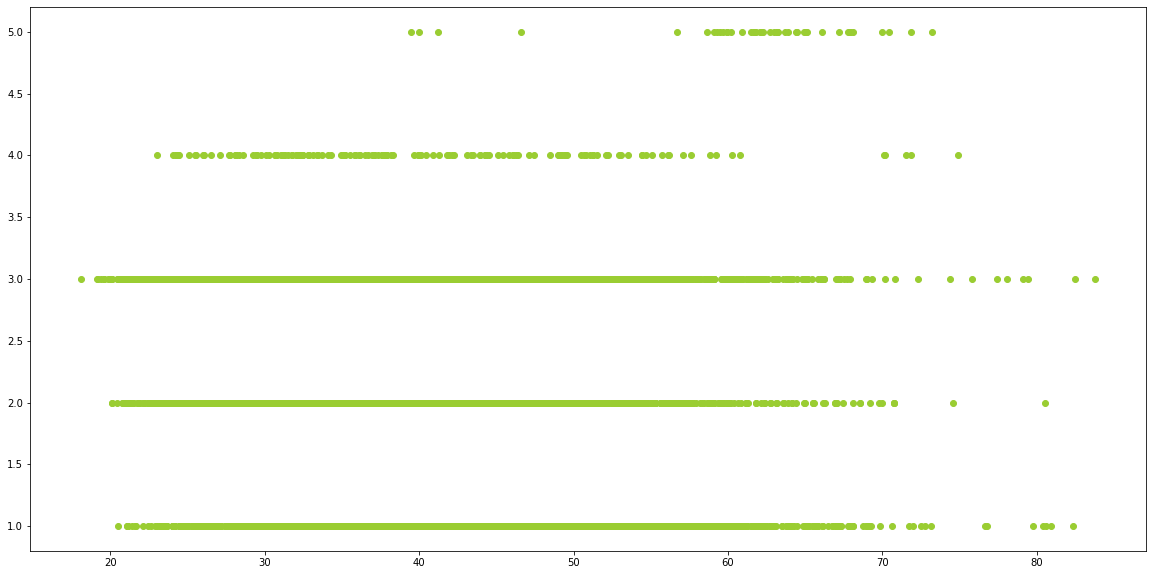

In [8]:
plt.scatter(data=df,x='Age',y='Total Work Experience',color='yellowgreen')

<AxesSubplot:xlabel='Age'>

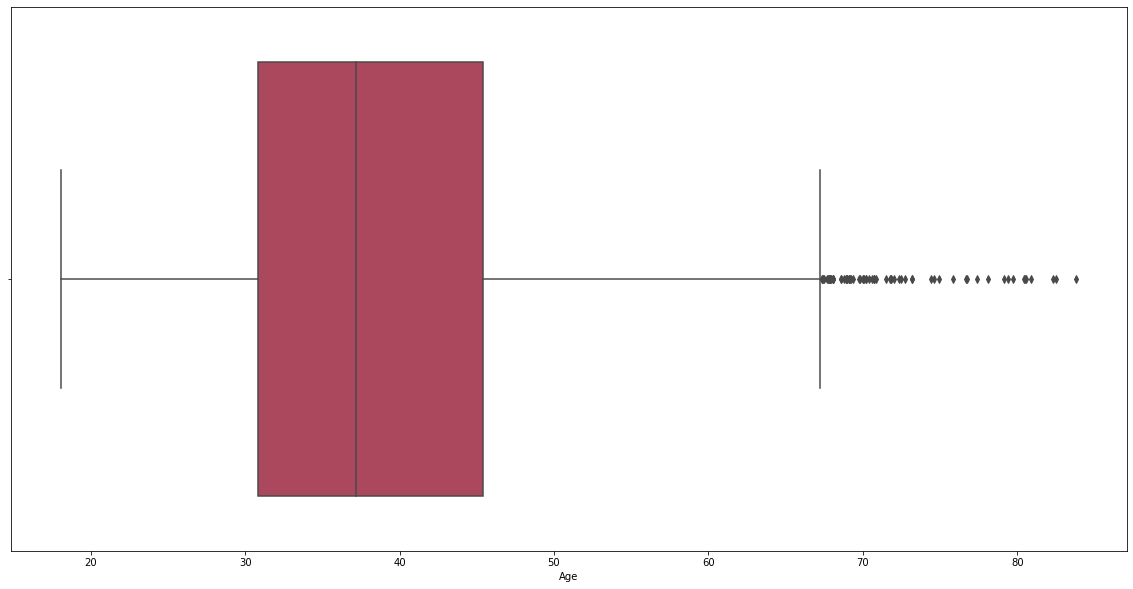

In [9]:
sns.boxplot(data=df,x='Age',palette='inferno')

<AxesSubplot:xlabel='Cibil score'>

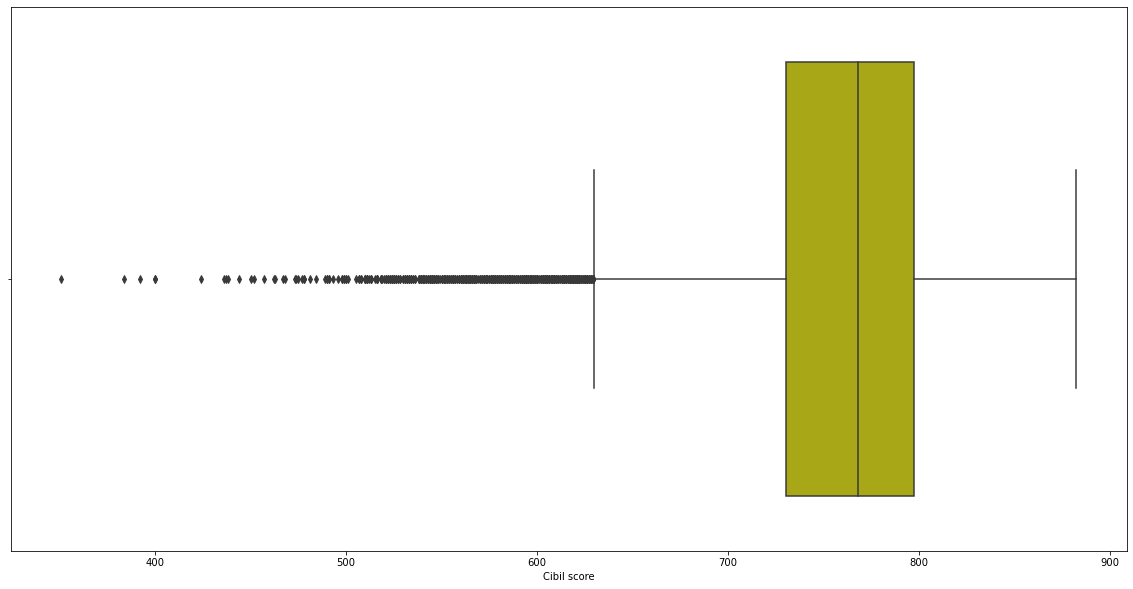

In [10]:
sns.boxplot(data=df,x='Cibil score',color='y')

### Defining Objects For Feature and Target

In [11]:
features=df.drop(['Total bounces past12months'],axis=1)

In [12]:
target=df["Total bounces past12months"]

In [13]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score,classification_report

### Splitting Data

In [14]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=10)

### Calling Model

In [15]:
model=KNeighborsClassifier()

In [16]:
model.fit(features_train,target_train)

KNeighborsClassifier()

In [17]:
predicted=model.predict(features_test)

### Checking Accuracy,Confusion Matrix,Classification Report

In [18]:
model.score(features_train,target_train)

0.6823235130628127

In [19]:
model.score(features_test,target_test)

0.6309060589216231

In [20]:
print(classification_report(target_test,predicted))

              precision    recall  f1-score   support

           0       0.66      0.96      0.78      1150
           1       0.26      0.08      0.12       281
           2       0.12      0.02      0.03       109
           3       0.00      0.00      0.00        69
           4       0.00      0.00      0.00        43
           5       0.00      0.00      0.00        28
           6       1.00      0.03      0.06        30
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00        20
           9       0.33      0.06      0.11        16
          10       0.00      0.00      0.00        15
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00         8

    accuracy                           0.63      1799
   macro avg       0.18      0.09      0.09      1799
weighted avg       0.49      0.63      0.53      1799



<AxesSubplot:>

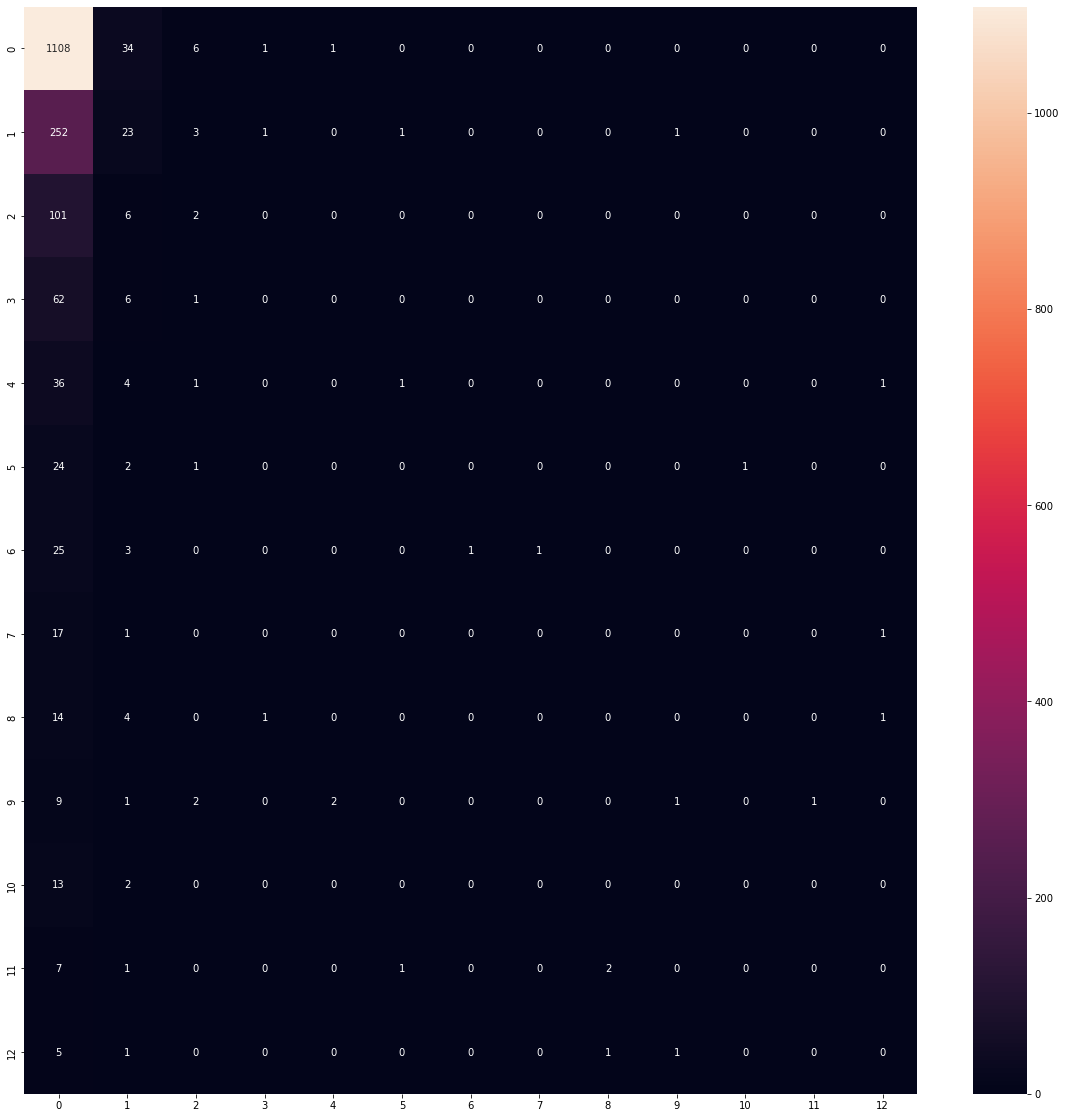

In [21]:
plt.figure(figsize=(20,20))
sns.heatmap(confusion_matrix(target_test,predicted),annot=True,fmt='d')

In [22]:
for i in range(1,70):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=43)
    model1=KNeighborsClassifier(i).fit(features_train,target_train)
    print(f'for value of k {i} accuracy is {model1.score(features_test,target_test)}')

for value of k 1 accuracy is 0.5380767092829349
for value of k 2 accuracy is 0.6309060589216231
for value of k 3 accuracy is 0.6342412451361867
for value of k 4 accuracy is 0.6436909394107838
for value of k 5 accuracy is 0.651473040578099
for value of k 6 accuracy is 0.6553640911617565
for value of k 7 accuracy is 0.659811006114508
for value of k 8 accuracy is 0.6575875486381323
for value of k 9 accuracy is 0.6575875486381323
for value of k 10 accuracy is 0.6592551417454141
for value of k 11 accuracy is 0.6581434130072262
for value of k 12 accuracy is 0.6581434130072262
for value of k 13 accuracy is 0.6564758198999444
for value of k 14 accuracy is 0.660366870483602
for value of k 15 accuracy is 0.660366870483602
for value of k 16 accuracy is 0.6592551417454141
for value of k 17 accuracy is 0.6609227348526959
for value of k 18 accuracy is 0.6625903279599777
for value of k 19 accuracy is 0.6631461923290717
for value of k 20 accuracy is 0.6637020566981656
for value of k 21 accuracy is 0.6

## Random State=43 &  n_neighbors=50 gives best accuracy

### Applying All the Algorithm

In [24]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

In [25]:
models={
        'lr':LogisticRegression(),
        'sg':SGDClassifier(),
        'tree':DecisionTreeClassifier(),
        'rf':RandomForestClassifier(),
        'gb':GradientBoostingClassifier(),
        'knn':KNeighborsClassifier(),
        'svm':SVC(),
        'ad':AdaBoostClassifier(),
        'nb':GaussianNB(),
        'lda':LinearDiscriminantAnalysis(),
        'qda':QuadraticDiscriminantAnalysis(),
        'xgb':XGBClassifier()
       }

In [26]:
for name, model in models.items():
    model1=model.fit(features_train,target_train)
    y_pred = model1.predict(features_test)
    print(f"{name} confuion matrix: \n {confusion_matrix(target_test,y_pred)}") 
    print(f'{name} accuracy score: {model1.score(features_test,target_test)}')
#     print(f'{name} precision score: {precision_score(target_test,y_pred)}')
#     print(f'{name} recall score: {recall_score(target_test,y_pred)}')
    print(f'{name} classification report :\n {classification_report(target_test,y_pred)}\n')

lr confuion matrix: 
 [[1201    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 231    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 105    1    0    0    0    0    0    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0    0    0    0    0    0    0]
 [  36    1    0    0    0    0    0    0    0    0    0    0    0]
 [  29    3    0    0    0    0    0    0    0    0    0    0    0]
 [  18    3    0    0    0    0    0    0    0    0    0    0    0]
 [  18    3    0    0    0    0    0    0    0    0    0    0    0]
 [  14    7    0    0    0    0    0    0    0    0    0    0    0]
 [  13    4    1    0    0    0    0    0    0    0    0    0    0]
 [  13    3    0    0    0    0    0    0    0    0    0    0    0]
 [   7    3    0    0    0    0    0    0    0    0    0    0    0]
 [   8    7    0    0    0    0    0    0    0    0    0    0    0]]
lr accuracy score: 0.6675931072818232
lr classification report :
               precision    

knn accuracy score: 0.651473040578099
knn classification report :
               precision    recall  f1-score   support

           0       0.69      0.96      0.80      1201
           1       0.20      0.08      0.11       231
           2       0.12      0.02      0.03       106
           3       0.00      0.00      0.00        70
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        32
           6       0.33      0.05      0.08        21
           7       0.00      0.00      0.00        21
           8       0.20      0.05      0.08        21
           9       0.50      0.06      0.10        18
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00        15

    accuracy                           0.65      1799
   macro avg       0.16      0.09      0.09      1799
weighted avg       0.51      0.65      0.55      1799


svm confuio

[11:46:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
xgb confuion matrix: 
 [[1169   25    3    2    1    0    0    1    0    0    0    0    0]
 [ 136   65   14    5    4    0    0    3    1    0    3    0    0]
 [  49   36    7    3    2    1    4    2    1    0    0    0    1]
 [  24   25    8    7    1    1    3    0    1    0    0    0    0]
 [  12   16    2    4    1    0    0    1    1    0    0    0    0]
 [   9   12    1    1    2    1    1    0    2    0    1    1    1]
 [   4    3    1    3    2    1    0    0    3    1    1    0    2]
 [   3    3    3    3    2    0    2    1    2    1    0    1    0]
 [   1    7    0    2    2    2    1    0    1    3    0    1    1]
 [   1    4    2    0    1    1    2    0    2    3   

## Random Forest And Naive Bayes Gives Best Accuracy